In [1]:
import pandas as pd
import numpy

In [2]:
df = pd.read_json('chifitnesscommentsentiment.json', orient='record')
df2 = pd.read_json('chifitnessreviewsentiment.json', orient='record')
df3 = pd.read_json('fitnessfirstcommentsentiment.json', orient='record')
df4 = pd.read_json('fitnessfirstreviewsentiment.json', orient='record')
df5 = pd.read_json('muayfitcommentsentiment.json', orient='record')

final_df = pd.concat([df,df2,df3,df4,df5], ignore_index=True)
final_df

,Comment,Post,Review,Sentiment,Source,Topic
0,never did imagine how many people have been to...,An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,"people,loss,issues"
1,really wanna join ...,An hour of workout is only 4% of your day! #No...,NaN,0.125,Facebook Comment Chi Fitness,join
2,anything about is very important,An hour of workout is only 4% of your day! #No...,NaN,1.000,Facebook Comment Chi Fitness,
3,upgrading the system is like forever.,An hour of workout is only 4% of your day! #No...,NaN,0.750,Facebook Comment Chi Fitness,system
4,"when the problem occurs, you will rise up the ...",An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,"problem,reasons"
5,do not tell me you are still in the process of...,An hour of workout is only 4% of your day! #No...,NaN,-0.125,Facebook Comment Chi Fitness,"process,system"
6,many times already.,An hour of workout is only 4% of your day! #No...,NaN,0.125,Facebook Comment Chi Fitness,times
7,this was not first time happen to me.,An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,time
8,i cannot plan my time for workout if i cant ac...,An hour of workout is only 4% of your day! #No...,NaN,-0.875,Facebook Comment Chi Fitness,"time,workout,access,timetable"
9,i am so stressful with this problem.,An hour of workout is only 4% of your day! #No...,NaN,-1.125,Facebook Comment Chi Fitness,problem


In [3]:
fitness_first1 = final_df[final_df['Source'] == 'Facebook Comment Fitness First']
fitness_first2 = final_df[final_df['Source'] == 'Facebook Review Fitness First']
fitness_first = pd.concat([fitness_first1, fitness_first2], ignore_index=True)
fitness_first_positive = fitness_first[fitness_first['Sentiment'] > 0]
fitness_first_negative = fitness_first[fitness_first['Sentiment'] < 0]

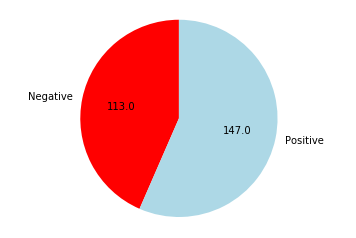

In [4]:
negative = len(fitness_first_negative)
positive = len(fitness_first_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('fitness_first_fb.png')
plt.show()

In [5]:
def wordListToFreqDict(topics):
    topics = topics['Topic'].tolist()
    print("Before: ", len(topics))
    topics = list(filter(None, topics))
    print("After: ", len(topics))
    topics = ','.join(topics)
    wordlist = topics.split(',')
    wordlist = [w for w in wordlist if w != 'thanks']
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))

Before:  147
After:  120


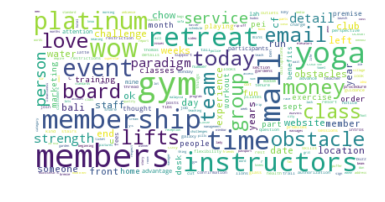

In [6]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(fitness_first_positive))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  113
After:  102


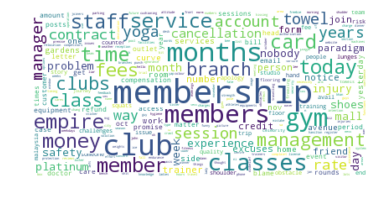

In [7]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(fitness_first_negative), max_font_size=40)


# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
chi_fitness1 = final_df[final_df['Source'] == 'Facebook Comment Chi Fitness']
chi_fitness2 = final_df[final_df['Source'] == 'Facebook Review Chi Fitness']
chi_fitness = pd.concat([chi_fitness1, chi_fitness2], ignore_index=True)
chi_fitness_positive = chi_fitness[chi_fitness['Sentiment'] > 0]
chi_fitness_negative = chi_fitness[chi_fitness['Sentiment'] < 0]

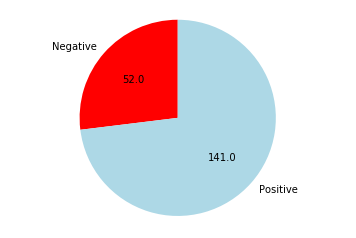

In [9]:
negative = len(chi_fitness_negative)
positive = len(chi_fitness_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('chifitness_fb.png')
plt.show()

In [10]:
chi_fitness_positive

,Comment,Post,Review,Sentiment,Source,Topic
1,really wanna join ...,An hour of workout is only 4% of your day! #No...,NaN,0.125,Facebook Comment Chi Fitness,join
2,anything about is very important,An hour of workout is only 4% of your day! #No...,NaN,1.000,Facebook Comment Chi Fitness,
3,upgrading the system is like forever.,An hour of workout is only 4% of your day! #No...,NaN,0.750,Facebook Comment Chi Fitness,system
6,many times already.,An hour of workout is only 4% of your day! #No...,NaN,0.125,Facebook Comment Chi Fitness,times
11,cool...,An hour of workout is only 4% of your day! #No...,NaN,0.500,Facebook Comment Chi Fitness,cool
12,anyone else love this post as much as me #tr...,An hour of workout is only 4% of your day! #No...,NaN,0.500,Facebook Comment Chi Fitness,post
13,posts like this are why everyone likes facebook,"It's Friday, but we hustle like it's Monday! ...",NaN,0.375,Facebook Comment Chi Fitness,posts
14,posts about great fitness advice are why eve...,"It's Friday, but we hustle like it's Monday! ...",NaN,0.250,Facebook Comment Chi Fitness,"posts,advice"
16,amazing post very interesting,"It's Friday, but we hustle like it's Monday! ...",NaN,0.125,Facebook Comment Chi Fitness,post
17,thanks for the info,"It's Friday, but we hustle like it's Monday! ...",NaN,0.125,Facebook Comment Chi Fitness,"thanks,info"


In [11]:
chi_fitness_negative

,Comment,Post,Review,Sentiment,Source,Topic
0,never did imagine how many people have been to...,An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,"people,loss,issues"
4,"when the problem occurs, you will rise up the ...",An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,"problem,reasons"
5,do not tell me you are still in the process of...,An hour of workout is only 4% of your day! #No...,NaN,-0.125,Facebook Comment Chi Fitness,"process,system"
7,this was not first time happen to me.,An hour of workout is only 4% of your day! #No...,NaN,-0.500,Facebook Comment Chi Fitness,time
8,i cannot plan my time for workout if i cant ac...,An hour of workout is only 4% of your day! #No...,NaN,-0.875,Facebook Comment Chi Fitness,"time,workout,access,timetable"
9,i am so stressful with this problem.,An hour of workout is only 4% of your day! #No...,NaN,-1.125,Facebook Comment Chi Fitness,problem
10,"hi, i am still having problem to access timeta...",An hour of workout is only 4% of your day! #No...,NaN,-0.375,Facebook Comment Chi Fitness,"problem,access,class,website"
15,they make dropping weight seem awful simple here.,"It's Friday, but we hustle like it's Monday! ...",NaN,-0.875,Facebook Comment Chi Fitness,"weight,simple"
21,or the next month still rm60?,CHi Fitness is proud to be Malaysian made! Cel...,NaN,-0.125,Facebook Comment Chi Fitness,month
23,jing yuan so cheap,CHi Fitness is proud to be Malaysian made! Cel...,NaN,-0.250,Facebook Comment Chi Fitness,yuan


Before:  141
After:  114


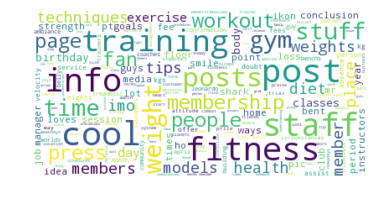

In [12]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(chi_fitness_positive))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  52
After:  48


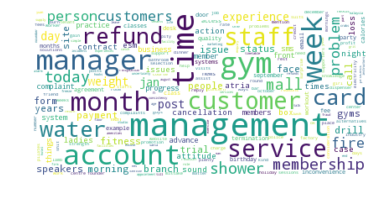

In [13]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000, max_font_size=40)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(chi_fitness_negative))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
muayfit = final_df[final_df['Source'] == 'Facebook Comment MuayFit']
muayfit_positive = muayfit[muayfit['Sentiment'] > 0]
muayfit_negative = muayfit[muayfit['Sentiment'] < 0]

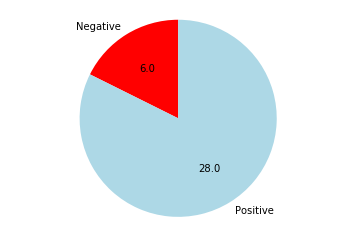

In [15]:
negative = len(muayfit_negative)
positive = len(muayfit_positive)

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Negative', 'Positive'
sizes = numpy.array([negative, positive])

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=['red','lightblue'], startangle=90, autopct=absolute_value)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('muayfit_fb.png')
plt.show()

Before:  28
After:  27


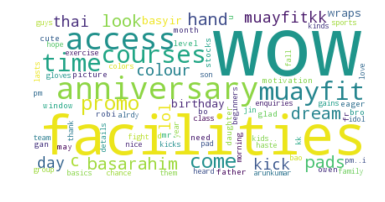

In [16]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(muayfit_positive))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Before:  6
After:  6


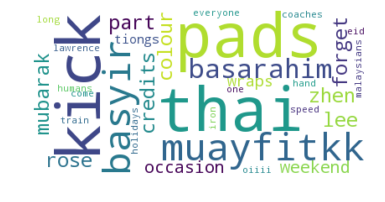

In [17]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(muayfit_negative))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
test = muayfit[muayfit['Sentiment'] > 0]
test[test['Comment'].str.contains('team member')]

,Comment,Post,Review,Sentiment,Source,Topic
464,I'm glad that he is one of your small team mem...,"Warren, oh Warren!\nWhy are you so photogenic?...",NaN,2.0,Facebook Comment MuayFit,"kinds,sports"


In [19]:
competitor_positive = pd.concat([fitness_first_positive, chi_fitness_positive], ignore_index=True)
competitor_negative = pd.concat([fitness_first_negative, chi_fitness_negative], ignore_index=True)

Before:  288
After:  234


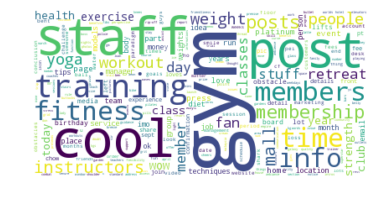

In [25]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(competitor_positive))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('mixed-positive.png', format='png', dpi=1000)
plt.show()

Before:  165
After:  150


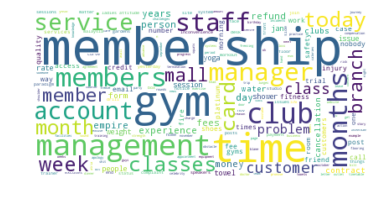

In [27]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
wc.generate_from_frequencies(wordListToFreqDict(competitor_negative))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('mixed-negative.png', format='png', dpi=1000)
plt.show()

In [36]:
competitor_positive[competitor_positive['Topic'].str.contains('platinum')]

,Comment,Post,Review,Sentiment,Source,Topic
33,hi how much is platinum (home) membership for ...,"Dear members,\n\nPlease be advised that, due t...",NaN,0.125,Facebook Comment Fitness First,"platinum,home,membership,year"
49,meaning the gym is now officially open for all...,Bring it on - #FitnessFirstPlatinumMelawatiMal...,NaN,0.125,Facebook Comment Fitness First,"gym,platinum,members"
135,for existing platinum members who already paid...,You can now gain access to 36 clubs nationwide...,NaN,0.625,Facebook Comment Fitness First,"platinum,members,sum"
145,NaN,NaN,I have been informed very friendly by your fro...,2.750,Facebook Review Fitness First,"front,desk,mall,sign,members,members,front,des..."


In [35]:
competitor_negative[competitor_negative['Topic'].str.contains('card')]

,Comment,Post,Review,Sentiment,Source,Topic
12,can i register via counter at mid valley branc...,Early Bird Tickets for Fit in The City are now...,NaN,-0.500,Facebook Comment Fitness First,"register,counter,valley,branch,branch,credit,card"
68,i did not check my credit card bill for a few ...,May the season bring you and your loved ones l...,NaN,-0.250,Facebook Comment Fitness First,"credit,card,bill,months,months"
103,NaN,NaN,"Within 3 months plus I joined the FF, the staf...",-2.625,Facebook Review Fitness First,"months,staff,membership,card,time,curve,branch..."
106,NaN,NaN,wish I read all the recent reviews here before...,-1.750,Facebook Review Fitness First,"reviews,experience,service,membership,word,car..."
110,NaN,NaN,Horrible experience with this club. They will ...,-4.875,Facebook Review Fitness First,"experience,club,money,authorization,injury,ses..."
157,NaN,NaN,"Hi, today i went to Atria mall CHI fitness for...",-3.125,Facebook Review Chi Fitness,"today,mall,trial,friend,front,girl,staff,today..."
160,NaN,NaN,"Same here, I'm totally disappointed I have alr...",-0.125,Facebook Review Chi Fitness,"contract,atria,month,month,charge,credit,card,..."
